In [ ]:
!pip install tensorflow_data_validation

In [ ]:
# Import dependencies
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
#import tensorflow_data_validation as tfdv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
import calendar
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = './drive/MyDrive/Colab Notebooks/smart-meters-in-london'

In [ ]:
# Read joint daily energy consumption and daily weather dataset
df = pd.read_csv(os.path.join(base_dir, "daily_weather.csv"))

In [ ]:
# Correct date data type
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Read public holiday dates dataset
df_holiday = pd.read_csv(os.path.join(base_dir, "uk_bank_holidays.csv"))

In [ ]:
# Correct date data type
df_holiday['Bank holidays'] = pd.to_datetime(df_holiday['Bank holidays'])

In [ ]:
# Create a public holiday date list
holiday_list = list(df_holiday['Bank holidays'])

In [ ]:
def new_column(row):
    if row['date'] in holiday_list:
        return 1
    else:
        return 0

In [ ]:
# Create holiday feature wether it is a pulic holiday (1) or not (0)
df['holiday'] = df.apply(new_column, axis=1)

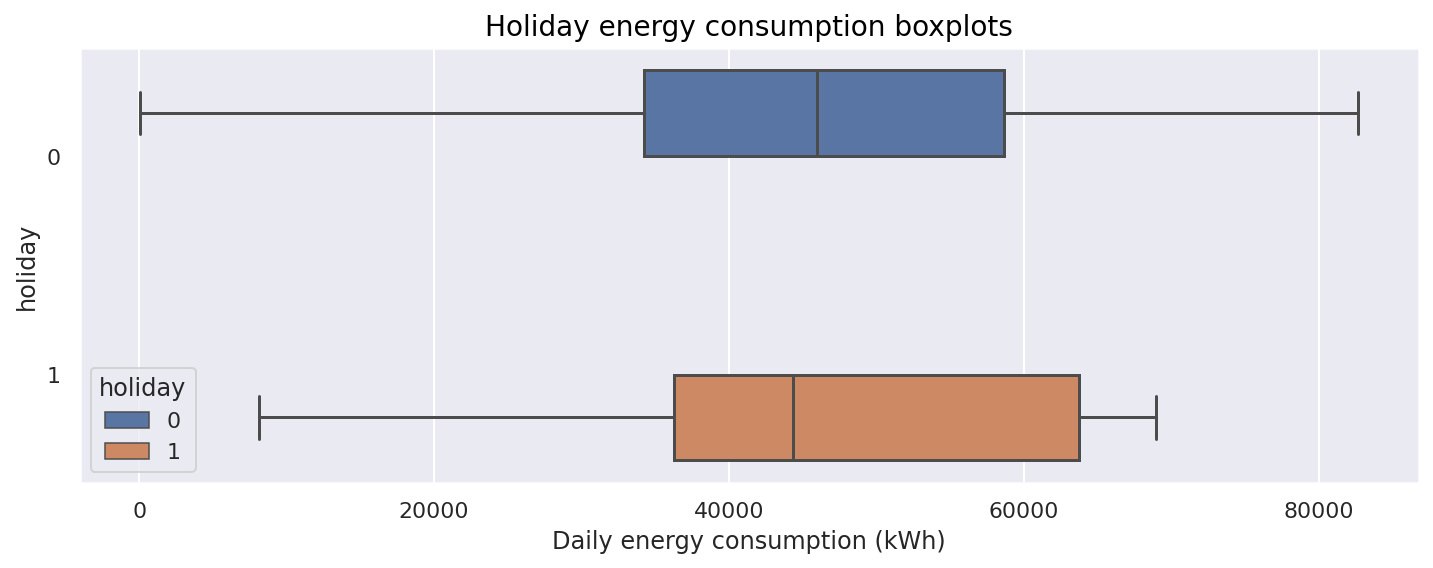

In [ ]:
# Average daily energy consumption boxplot between the two public holiday groups
df_box = df[['holiday', 'energy_sum']]
fig,ax=plt.subplots(figsize=(12,4))
ax = sns.boxplot(data=df_box, x='energy_sum', y ='holiday',  hue='holiday', orient="h")
plt.title("Holiday energy consumption boxplots",fontsize=14, color='black')
plt.xlabel("Daily energy consumption (kWh)")
plt.show()

In [ ]:
# Save the dataset with the holiday feature column added
df.to_csv(os.path.join(base_dir, "energy_data.csv"), sep=',', index=False, encoding='utf-8')

In [ ]:
df.head()

,date,energy_sum,windBearing,windSpeed,cloudCover,pressure,visibility,humidity,icon,precipType,moonPhase,temp,holiday
0,2011-11-23,90.385000,229.0,2.04,0.36,1027.12,8.06,0.93,fog,rain,0.94,10.36,0
1,2011-11-24,213.412000,204.0,4.04,0.41,1027.22,10.64,0.89,partly-cloudy-night,rain,0.97,12.93,0
2,2011-11-25,303.993000,243.0,5.02,0.48,1024.47,12.38,0.79,partly-cloudy-day,rain,0.01,13.03,0
3,2011-11-26,420.976000,237.0,5.75,0.44,1025.80,13.07,0.81,wind,rain,0.05,12.96,0
4,2011-11-27,444.883001,256.0,5.48,0.42,1021.11,13.08,0.72,wind,rain,0.08,13.54,0
